# An Introduction to FOSS4G for Geospatial Analysis
<img src="./Dataset/logo-osgeo.svg">                                                            

## Introduction
ArcGIS has been a staple in mapping and geospatial analysis world. It is a state-of-the-art geospatial software that provides numerous functionalities in a very user-friendly environment. But benifitting from these advantages of ArcGIS comes at a cost, and not all of it is monetary: 
- ArcGIS is a huge software. A single installation of recent versions of ArcGIS is of more than 5GB and we don't even use many features it provides 
- ArcGIS is a resource-consuming software
- ArcGIS is not suitable for processing of data that is very large
- For certain kind of tasks, ArcGIS is restrictive and does not provide enough options. 

But we have much more options than just ArcGIS to overcome these disadvantages inherent in ArcGIS. In recent years, **QuantumGIS (QGIS)** has been come forth as a good open source alternative to ArcGIS. It provides both feature-rich mapping options and strong low-level geospatial analysis capabilities. It provides a good integration with Python. Moreover, it has a very active developer community and a very huge user base. 

But in this notebook, we will not be discussing about QGIS. Instead, we will introudce some free and open source tools for executing geospatial operations using GDAL/OGR and Python. Python is replete with many libraries that provide different geospatial functionalities. An extensive list of Python geospatial libraries can be found [here](https://github.com/SpatialPython/spatial_python/blob/master/packages.md). Here we will just be scratching the surface of this really rich world. 

The data used in this notebook is stored in this same repository inside the folder `./Dataset`

In [3]:
# Set up our workspace
% matplotlib inline
import os
from pprint import pprint
from matplotlib import pyplot as plt

basedir = os.getcwd()

## GDAL/OGR 
GDAL stands for [Geospatial Data Abstraction Library](http://www.gdal.org/), and is developed by Open Source Geospatial Foundation. It has the capacity to read various vector and raster data formats. It consists of various libraries, written in C++ and distributed as free software. GDAL/OGR commands are basically run in the command line as bash commands. But as we will see in this course, various softwares and programming languages provide APIs to carry out geospatial analysis using GDAL/OGR.  QGIS and GRASS GIS are also integrated with GDAL and thus provide a GUI based experience to work with GDAL/OGR.

### Using GDAL to veiw  Raster metadata
GDAL facilitates working with raster data, and provides many commands/functions to manipulate raster files. It supports many raster file formats. Details of the function *gdalinfo* can be found in http://www.gdal.org/gdalinfo.html. 

In [1]:
%%bash
pwd
gdalinfo -norat -noct ./Dataset/raster/*.tif

/home/serenewizard/Repos/foss4geo
Driver: GTiff/GeoTIFF
Files: ./Dataset/raster/Land_Use.tif
       ./Dataset/raster/Land_Use.tif.ovr
       ./Dataset/raster/Land_Use.tif.aux.xml
Size is 3034, 3386
Coordinate System is:
PROJCS["Albers_Conical_Equal_Area",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.2572221010042,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (554625.000000000000000,2005545.000000000000000)
Pixel Size = (30.000000000000000,-30.0

### Using OGR to view Vector Metadata
OGR provides an interface to work with vector data, and supports many vector data formats , including the most popular one - **ESRI Shapefile**. Details of the function *ogrinfo* can be found in http://www.gdal.org/ogrinfo.html. 

In [2]:
%%bash
pwd
ogrinfo -al -so ./Dataset/vector/*.shp

/home/serenewizard/Repos/foss4geo
INFO: Open of `./Dataset/vector/Dewitt_Mclean.shp'
      using driver `ESRI Shapefile' successful.

Layer name: Dewitt_Mclean
Metadata:
  DBF_DATE_LAST_UPDATE=2017-10-04
Geometry: Polygon
Feature Count: 2
Extent: (-89.269325, 40.048843) - (-88.459058, 40.757393)
Layer SRS WKT:
GEOGCS["GCS_North_American_1983",
    DATUM["North_American_Datum_1983",
        SPHEROID["GRS_1980",6378137.0,298.257222101]],
    PRIMEM["Greenwich",0.0],
    UNIT["Degree",0.0174532925199433],
    AUTHORITY["EPSG","4269"]]
COUNTY_NAM: String (16.0)
CO_FIPS: Integer (4.0)


## <font color=green> Geopandas </font> library in Python
**Geopandas** is used to create, read, write and manipulate the vector data. This library is an extension of pandas (a data analysis) library, where the spatial information is stored in the <font color=blue> **geometry** </font> column. Each feature of the shapefile is represented by the dataframe row. 

In [6]:
import geopandas as gpd

vectorpath = os.path.join(basedir, "Dataset", "vector", "Dewitt_Mclean.shp")
src = gpd.read_file(vectorpath)

In [7]:
# Get the Shapefile VAT table as geopandas dataframe
src

,COUNTY_NAM,CO_FIPS,geometry
0,MCLEAN,113,"POLYGON ((-88.92942840000001 40.7532964, -88.9..."
1,DEWITT,39,"POLYGON ((-89.1487939 40.2820954, -89.13023680..."


In [8]:
# Get the coordinate reference system of the dataframe
src.crs

{'init': 'epsg:4269'}

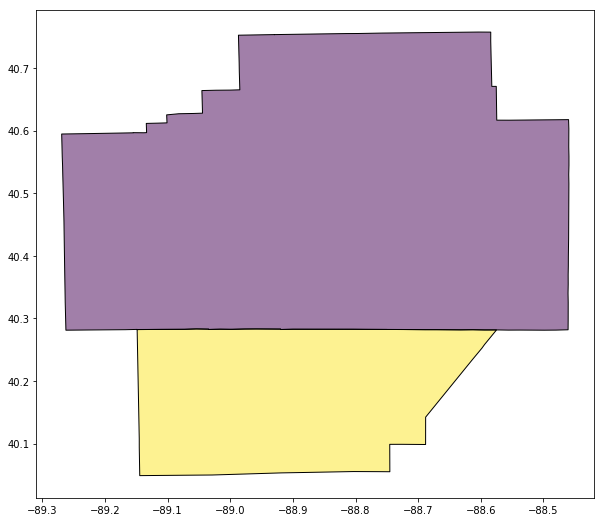

In [9]:
# Plot the features of the shapefile
plots = src.plot(figsize=(10,10))

You can also use the native matplotlib features to transform this plot into an informative maps. 

## <font color= green> Fiona </font> library in Python
**Fiona** is another library that is used to create, read, write and manipulate the vector data. Fiona provides an API to the the underlying OGR library.

In [10]:
import fiona

vectorpath = os.path.join(basedir, "Dataset", "vector", "Dewitt_Mclean.shp")
vect_src = fiona.open(vectorpath)

In [11]:
# Metadata of the shapefile
vect_src.meta

{'crs': {'init': 'epsg:4269'},
 'crs_wkt': 'GEOGCS["GCS_North_American_1983",DATUM["North_American_Datum_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]]',
 'driver': 'ESRI Shapefile',
 'schema': {'geometry': 'Polygon',
  'properties': OrderedDict([('COUNTY_NAM', 'str:16'), ('CO_FIPS', 'int:4')])}}

In [12]:
# Driver of the shapefile
vect_src.driver

'ESRI Shapefile'

In [13]:
#Schema of the shapefile
pprint(vect_src.schema)

{'geometry': 'Polygon',
 'properties': OrderedDict([('COUNTY_NAM', 'str:16'), ('CO_FIPS', 'int:4')])}


In [14]:
#CRS of the shapefile
vect_src.crs

{'init': 'epsg:4269'}

In [15]:
# Number of features in the shapefile
len(list(vect_src))

2

In [16]:
# The extent of the shapefile
vect_src.bounds

(-89.2693252, 40.0488429, -88.459058, 40.7573927)

In [17]:
# Get the first feature of the shapefile
for feature in vect_src:
    print(feature['properties'])

OrderedDict([('COUNTY_NAM', 'MCLEAN'), ('CO_FIPS', 113)])
OrderedDict([('COUNTY_NAM', 'DEWITT'), ('CO_FIPS', 39)])


In [18]:
# Get the geometry of the first feature 
#(commented out becuase it gives a long list of geometries)
#pprint(feature['geometry'])

Note: You need to close the file after you are done with it. 

In [19]:
vect_src.close()

## <font color= green> Rasterio </font> library in Python
Rasterio provides a user-friendly API to the underlying GDAL library for raster data manipulation. 

In [20]:
import rasterio

rasterpath = os.path.join(basedir, "Dataset", "raster", "Land_Use.tif")
rast_src = rasterio.open(rasterpath)

In [21]:
# Metadata of the raster file
rast_src.meta

{'affine': Affine(30.0, 0.0, 554625.0,
       0.0, -30.0, 2005545.0),
 'count': 1,
 'crs': CRS({'lat_2': 45.5, 'proj': 'aea', 'y_0': 0, 'lon_0': -96, 'lat_0': 23, 'datum': 'NAD83', 'no_defs': True, 'x_0': 0, 'units': 'm', 'lat_1': 29.5}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 3386,
 'nodata': 255.0,
 'transform': (554625.0, 30.0, 0.0, 2005545.0, 0.0, -30.0),
 'width': 3034}

In [22]:
# Driver of the raster
rast_src.driver

'GTiff'

In [23]:
# CRS of the raster
rast_src.get_crs()

CRS({'lat_2': 45.5, 'proj': 'aea', 'y_0': 0, 'lon_0': -96, 'lat_0': 23, 'datum': 'NAD83', 'no_defs': True, 'x_0': 0, 'units': 'm', 'lat_1': 29.5})

In [24]:
# Affine of the raster
pprint(rast_src.affine)

Affine(30.0, 0.0, 554625.0,
       0.0, -30.0, 2005545.0)


In [25]:
# Number of bands in the raster
rast_src.count

1

In [26]:
# The extent of the raster
pprint(rast_src.bounds)

BoundingBox(left=554625.0, bottom=1903965.0, right=645645.0, top=2005545.0)


In [27]:
# Shape of the raster
rast_src.shape

(3386, 3034)

In [28]:
# Value representing no data in raster
rast_src.nodatavals

(255.0,)

In [29]:
# Resolution of the raster
rast_src.res

(30.0, 30.0)

In [30]:
# Read the data from the first band
band = rast_src.read(1)
band.view()

array([[41, 41, 41, ..., 82, 82, 82],
       [41, 41, 41, ..., 82, 82, 82],
       [41, 41, 41, ..., 82, 82, 82],
       ..., 
       [22, 82, 82, ..., 82, 82, 82],
       [22, 82, 82, ..., 82, 82, 82],
       [22, 82, 82, ..., 82, 82, 82]], dtype=uint8)

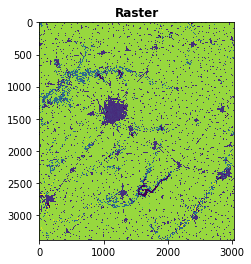

In [31]:
# Visualize the raster band
from rasterio.plot import show
show(rast_src, title="Raster", cmap='viridis')

Make sure you close the raster file at the end of the operation

In [32]:
rast_src.close()

## Some fun stuffs with programming for GIS
### Save each feature as individual file

In [34]:
import os
import shutil
import fiona

# Pointing to the larger input shapefile
inpath = os.path.join(basedir, "Dataset", "vector", "Dewitt_Mclean.shp")

# Setting up where our output features as shapefiles will be stored
outdir = os.path.join(basedir, "Dataset", "individual_features")
if os.path.exists(outdir):
    shutil.rmtree(outdir)
os.makedirs(outdir)


###############
with fiona.drivers():
    with fiona.open(inpath, 'r') as src:
        dest_schema = src.schema.copy()
        crs = src.crs
        for n, feature in enumerate(src):
            county = feature['properties']['COUNTY_NAM']
            outfname = ".".join([county, "shp"])
            outfpath = os.path.join(outdir, outfname)
            with fiona.open(outfpath, 'w', 'ESRI Shapefile', dest_schema, crs=crs) as dest: 
                dest.write(feature)        

## Further work...
This notebook will be further updated in the future. Keep checking out time and again. 